In [2]:
import wapordl
import pandas as pd
import os

# OpenET benchmark sites

![](https://ars.els-cdn.com/content/image/1-s2.0-S0168192323000011-gr1.jpg)

- Method: [Volk et al., 2023](https://doi.org/10.1016/j.agrformet.2023.109307)
- Dataset: [Volk et al., 2023](https://doi.org/10.1016/j.dib.2023.109274) **161 sites**
- Software: [Volk et al., 2021](https://doi.org/10.21105/joss.03418)
- Validation paper: [Volk et al., 2024](https://doi.org/10.1038/s44221-023-00181-7) **152 sites**

In [2]:
stations_file = r"E:\OpenET\flux_ET_dataset\fluxqaqc_station_metadata.xlsx"
df_stations = pd.read_excel(stations_file,skiprows=1)
df_stations

,Site ID,General classification,State,Data source/network,Period of record,Energy balance,Latitude,Longitude,Elevation (m),Land cover details,Land cover type,Measurement technique,Contact for sites not downloaded from AmeriFlux network,Contact email,DOI,Team member,Member role,Member institution,Member email,Site name
0,US-A32,Grasslands,OK,AmeriFlux,06/2015-06/2017,0.903129,36.819268,-97.819772,335.0,Hay pasture,Grasslands,Eddy covariance,NaN,NaN,10.17190/AMF/1436327,Lara Kueppers,PI,Lawrence Berkeley National Laboratory,lmkueppers@lbl.gov,ARM-SGP Medford hay pasture
1,US-A74,Croplands,OK,AmeriFlux,01/2016-10/2017,0.920941,36.808464,-97.548854,337.0,Sorghum,Annual crops,Eddy covariance,NaN,NaN,10.17190/AMF/1436328,Lara Kueppers,PI,Lawrence Berkeley National Laboratory,lmkueppers@lbl.gov,ARM SGP milo field
2,US-ADR,Shrublands,NV,AmeriFlux,05/2011-05/2017,0.919211,36.765278,-116.693333,842.0,Greasewood,Shrublands,Eddy covariance,NaN,NaN,10.17190/AMF/1418680,Michael Moreo,PI,U.S. Geological Survey,mtmoreo@usgs.gov,Amargosa Desert Research Site (ADRS)
3,US-AR1,Croplands,OK,AmeriFlux,06/2009-12/2012,1.089527,36.426700,-99.420000,611.0,Planted Switchgrass,Annual crops,Eddy covariance,NaN,NaN,10.17190/AMF/1246137,Dave Billesbach,PI,University of Nebraska,dbillesbach1@unl.edu,ARM USDA UNL OSU Woodward Switchgrass 1
4,US-ARb,Grasslands,OK,AmeriFlux,03/2005-10/2006,1.005785,35.549700,-98.040200,424.0,Native tallgrass prairie,Grasslands,Eddy covariance,NaN,NaN,10.17190/AMF/1246025,Margaret Torn,PI,Lawrence Berkeley National Laboratory,mstorn@lbl.gov,ARM Southern Great Plains burn site- Lamont
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,UOVLO,Shrublands,NV,USGS NWSC,07/1998-09/2000,NaN,37.045000,-116.709000,1177.0,Greasewood,Shrublands,Eddy covariance,Steve R. Reiner,srreiner@usgs.gov,10.3133/wri014239,NaN,NaN,NaN,NaN,NaN
157,UOVMD,Grasslands,NV,USGS NWSC,12/1998-09/2000,NaN,37.047000,-116.712000,1175.0,Salt Grass,Grasslands,Eddy covariance,Steve R. Reiner,srreiner@usgs.gov,10.3133/wri014239,NaN,NaN,NaN,NaN,NaN
158,UOVUP,Shrublands,NV,USGS NWSC,01/1998-09/2000,NaN,37.064000,-116.695000,1198.0,Wolfberry/Rabbitbrush,Shrublands,Eddy covariance,Steve R. Reiner,srreiner@usgs.gov,10.3133/wri014239,NaN,NaN,NaN,NaN,NaN
159,WRV_1,Shrublands,NV,USGS NWSC,09/2005-08/2007,0.994121,38.413600,-115.050900,1600.0,Greasewood,Shrublands,Eddy covariance,Michael T. Moreo,mtmoreo@usgs.gov,10.3133/sir20075078,NaN,NaN,NaN,NaN,NaN


In [10]:
t = 0

In [11]:
variable = "L1-AETI-D"
period = ["2018-01-01", "2024-06-30"]
dx=100/(1000*111.31) #buffer distance around the point is 100m
for i,row in df_stations.iterrows():
    filename=r'Data/WaPOR/WaPOR_v3_L1_AETI_{0}.csv'.format(row['Site ID'])
    if i <= t and os.path.exists(filename): #skip the downloaded ones
        continue
    print(row['Site ID'])
    lat = row['Latitude']
    lon = row['Longitude']
#     dx = row['Support (m)']/(1000*111.31) #convert support to degree
    bb = [lon-dx,lat-dx,lon+dx,lat+dx] #bounding box around the station
    overview = 3
    df = wapordl.wapor_ts(bb, variable, period, overview)
    
    df.to_csv(filename)

US-A74


INFO: Found 234 files for L1-AETI-D.


US-ADR


INFO: Found 234 files for L1-AETI-D.


US-AR1


INFO: Found 234 files for L1-AETI-D.


US-ARb


INFO: Found 234 files for L1-AETI-D.


US-ARc


INFO: Found 234 files for L1-AETI-D.


US-ARM


INFO: Found 234 files for L1-AETI-D.


US-Aud


INFO: Found 234 files for L1-AETI-D.


US-Bi1


INFO: Found 234 files for L1-AETI-D.


US-Bi2


INFO: Found 234 files for L1-AETI-D.


US-Bkg


INFO: Found 234 files for L1-AETI-D.


US-Blk


INFO: Found 234 files for L1-AETI-D.


US-Blo


INFO: Found 234 files for L1-AETI-D.


US-Bo1


INFO: Found 234 files for L1-AETI-D.


US-Br1


INFO: Found 234 files for L1-AETI-D.


US-Br3


INFO: Found 234 files for L1-AETI-D.


US-Ced


INFO: Found 234 files for L1-AETI-D.


US-CMW


INFO: Found 234 files for L1-AETI-D.


US-CRT


INFO: Found 234 files for L1-AETI-D.


US-Ctn


INFO: Found 234 files for L1-AETI-D.


US-CZ3


INFO: Found 234 files for L1-AETI-D.


US-Dix


INFO: Found 234 files for L1-AETI-D.


US-Dk1


INFO: Found 234 files for L1-AETI-D.


US-Dk2


INFO: Found 234 files for L1-AETI-D.


US-Esm


INFO: Found 234 files for L1-AETI-D.


US-Fmf


INFO: Found 234 files for L1-AETI-D.


US-FPe


INFO: Found 234 files for L1-AETI-D.


US-FR2


INFO: Found 234 files for L1-AETI-D.


US-Fuf


INFO: Found 234 files for L1-AETI-D.


US-Fwf


INFO: Found 234 files for L1-AETI-D.


US-GLE


INFO: Found 234 files for L1-AETI-D.


US-GMF


INFO: Found 234 files for L1-AETI-D.


US-Goo


INFO: Found 234 files for L1-AETI-D.


US-Hn2


INFO: Found 234 files for L1-AETI-D.


US-Hn3


INFO: Found 234 files for L1-AETI-D.


US-IB1


INFO: Found 234 files for L1-AETI-D.


US-IB2


HTTPError: 500 Server Error: Internal Server Error for url: https://data.apps.fao.org/gismgr/api/v2/catalog/workspaces/WAPOR-3/mapsets/L1-AETI-D/rasters?filter=time:OVERLAPS:2018-01-01:2024-06-30;

# FLUXNET2022 sites

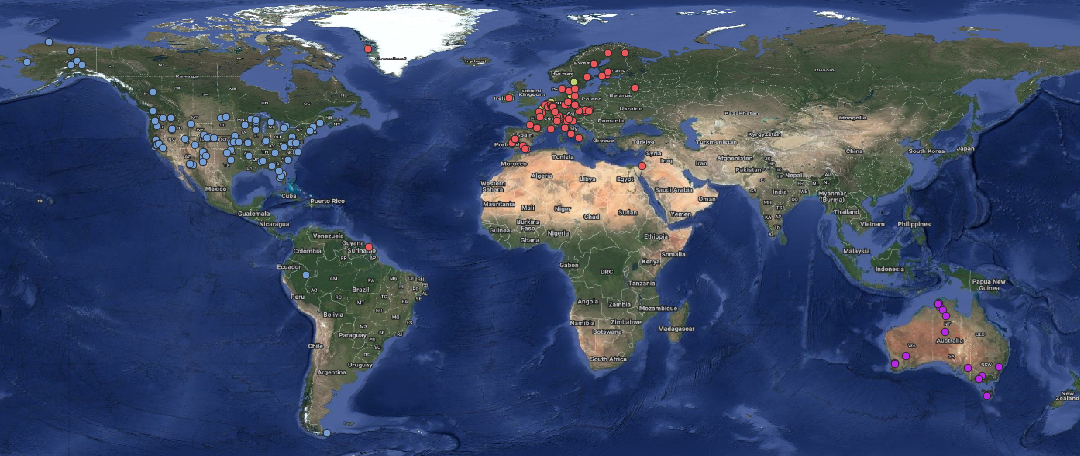

In [3]:
stations_file = r"../0_insitu/FLUXNET2022.xlsx"
df_stations = pd.read_excel(stations_file,index_col=0)
df_stations

,Site,Period,Dataset,x,y
0,AR-TF1,2016-2018,AMF,-66.733500,-54.973300
1,CA-Cbo,1994-2020,AMF,-79.933300,44.316700
2,CA-DB2,2019-2020,AMF,-122.995100,49.119000
3,CA-DBB,2014-2020,AMF,-122.984900,49.129300
4,CA-ER1,2015-2020,AMF,-80.412300,43.640500
...,...,...,...,...,...
267,SE-Deg,2001-2020,ICOS-WW,19.557448,64.182333
268,SE-Htm,2015-2020,ICOS-WW,13.417893,56.097566
269,SE-Nor,2014-2020,ICOS-WW,17.478520,60.086990
270,SE-Ros,2014-2020,ICOS-WW,19.738000,64.172500


NOTE

Results from overview = 3, is moved to WaPOR-wapordl-overview3 folder

Extract using overview = NONE

In [9]:
variable = "L1-AETI-D"
period = ["2018-01-01", "2024-12-31"]
t = 0 #in case interrupted, continue
dx=100/(1000*111.31) #buffer distance around the point is 100m
for i,row in df_stations.iterrows():
    if i <t:
        continue
    filename=r'Data/WaPOR/WaPOR_v3_L1_AETI_{0}.csv'.format(row['Site'])
    # if i <= t and os.path.exists(filename): #skip the downloaded ones
    #     continue
    print(row['Site'])
    lat = row['y']
    lon = row['x']
#     dx = row['Support (m)']/(1000*111.31) #convert support to degree
    bb = [lon-dx,lat-dx,lon+dx,lat+dx] #bounding box around the station
    overview = "NONE"
    df = wapordl.wapor_ts(bb, variable, period, overview)
    
    df.to_csv(filename)

AR-TF1


INFO: Found 252 files for L1-AETI-D.

                                                                                                                       

CA-Cbo


INFO: Found 252 files for L1-AETI-D.

                                                                                                                       

CA-DB2


INFO: Found 252 files for L1-AETI-D.

                                                                                                                       

CA-DBB


INFO: Found 252 files for L1-AETI-D.

                                                                                                                       

CA-ER1


INFO: Found 252 files for L1-AETI-D.

                                                                                                                       

CA-LP1


INFO: Found 252 files for L1-AETI-D.

                                                                                                                       

PE-QFR


INFO: Found 252 files for L1-AETI-D.

                                                                                                                       

US-ALQ


INFO: Found 252 files for L1-AETI-D.

                                                                                                                       

US-ARM


INFO: Found 252 files for L1-AETI-D.

                                                                                                                       

US-Bar


INFO: Found 252 files for L1-AETI-D.

                                                                                                                       

US-Bi1


INFO: Found 252 files for L1-AETI-D.

                                                                                                                       

US-Bi2


INFO: Found 252 files for L1-AETI-D.

                                                                                                                       

US-BRG


INFO: Found 252 files for L1-AETI-D.

                                                                                                                       

US-BZB


INFO: Found 252 files for L1-AETI-D.

                                                                                                                       

US-BZF


INFO: Found 252 files for L1-AETI-D.

                                                                                                                       

US-BZo


INFO: Found 252 files for L1-AETI-D.

                                                                                                                       

US-BZS


INFO: Found 252 files for L1-AETI-D.

                                                                                                                       

US-CF1


HTTPError: 500 Server Error: Internal Server Error for url: https://data.apps.fao.org/gismgr/api/v2/catalog/workspaces/WAPOR-3/mapsets/L1-AETI-D/rasters?page=6&filter=time:OVERLAPS:2018-01-01:2024-12-31;

In [10]:
t=i

In [11]:
t

17